In [1]:
from google.colab import files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Upload kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bailalayoub","key":"f6e1b52ac8a3d098940397f2a09ad283"}'}

In [4]:
# Install Kaggle API client
!pip install -q kaggle

In [5]:
# Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
# Change permissions
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Create and change to dataset directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [8]:
# Search for the dataset
!kaggle datasets list -s gtsrb-german-traffic-sign


ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          98220       1055  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          12816        276  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            416         29  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [9]:
# Download dataset and navigate out of the directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 97% 595M/612M [00:04<00:00, 179MB/s]
100% 612M/612M [00:04<00:00, 133MB/s]
/content


In [10]:
# Unzip and remove unnecessary files
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png 

In [11]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


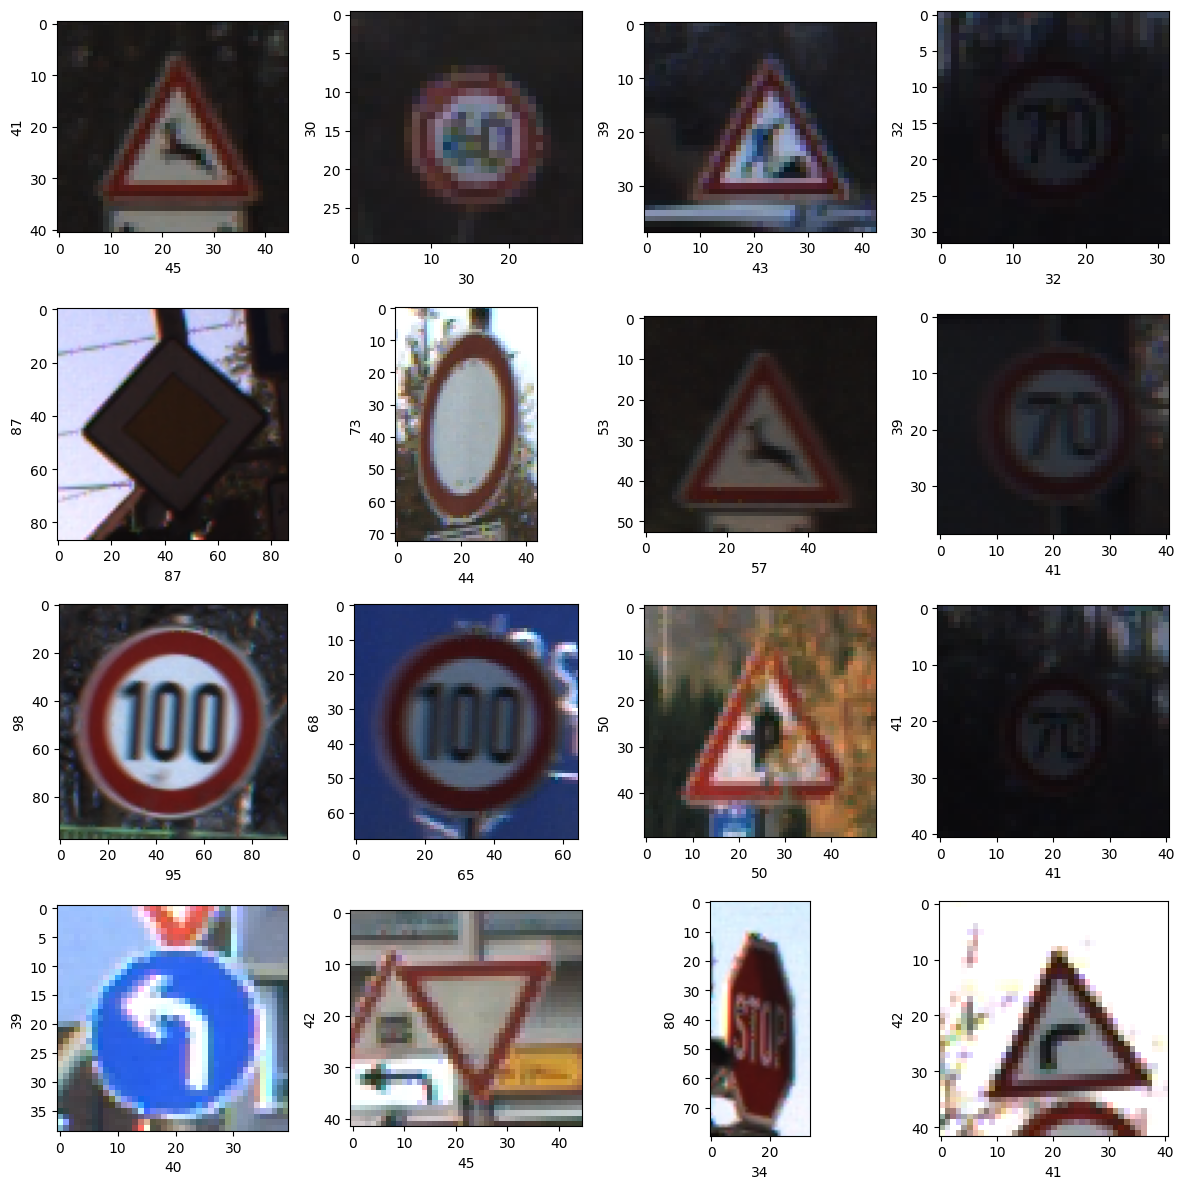

In [12]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12, 12))
path = "traffic_sign_dataset/Test"
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)
    plt.ylabel(rand_img.shape[0], fontsize=10)


In [13]:
# As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []


In [14]:
for i in range(0, 43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


In [15]:
# Printing mean dimension of images
print("Dimension 1 Mean: ", np.mean(dim1), " Dimension 2 Mean: ", np.mean(dim2))


Dimension 1 Mean:  50.328929582493814  Dimension 2 Mean:  50.83587951745773


In [16]:
# Now we will reshape the images to (50, 50)
images = []
label_id = []


In [17]:
for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)


In [18]:
# Converting images into numpy array
images = np.array(images)

In [19]:
# The pixel value of each image ranges between 0 and 255
# Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images / 255

In [20]:
# Storing the label ids into numpy array
label_id = np.array(label_id)

In [21]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()


In [22]:
# Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)


In [23]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=43)  # Assuming 43 classes
y_val_cat = to_categorical(y_val, num_classes=43)


In [24]:
# Define the model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))


In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [27]:
# Train the model
history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_data=(x_val, y_val_cat), verbose=2)


Epoch 1/20
246/246 - 12s - loss: 2.4795 - accuracy: 0.3213 - val_loss: 1.1790 - val_accuracy: 0.7183 - 12s/epoch - 48ms/step
Epoch 2/20
246/246 - 5s - loss: 1.1429 - accuracy: 0.6430 - val_loss: 0.4790 - val_accuracy: 0.8906 - 5s/epoch - 21ms/step
Epoch 3/20
246/246 - 5s - loss: 0.7631 - accuracy: 0.7552 - val_loss: 0.2889 - val_accuracy: 0.9385 - 5s/epoch - 20ms/step
Epoch 4/20
246/246 - 5s - loss: 0.6054 - accuracy: 0.8071 - val_loss: 0.2093 - val_accuracy: 0.9589 - 5s/epoch - 20ms/step
Epoch 5/20
246/246 - 5s - loss: 0.5022 - accuracy: 0.8366 - val_loss: 0.1590 - val_accuracy: 0.9718 - 5s/epoch - 19ms/step
Epoch 6/20
246/246 - 5s - loss: 0.4312 - accuracy: 0.8588 - val_loss: 0.1595 - val_accuracy: 0.9735 - 5s/epoch - 21ms/step
Epoch 7/20
246/246 - 5s - loss: 0.3943 - accuracy: 0.8724 - val_loss: 0.1060 - val_accuracy: 0.9783 - 5s/epoch - 20ms/step
Epoch 8/20
246/246 - 5s - loss: 0.3485 - accuracy: 0.8872 - val_loss: 0.0942 - val_accuracy: 0.9833 - 5s/epoch - 20ms/step
Epoch 9/20
246

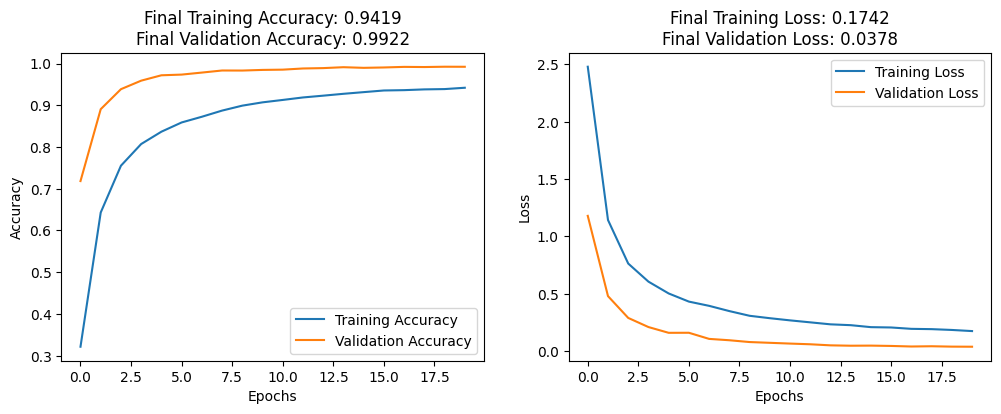

In [43]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Final Training Accuracy: {history.history["accuracy"][-1]:.4f}\nFinal Validation Accuracy: {history.history["val_accuracy"][-1]:.4f}')
plt.legend()
plt.savefig('/content/drive/MyDrive/Traffic Sign Classification/accuracy_plot.png')  # Save accuracy plot as PNG

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Final Training Loss: {history.history["loss"][-1]:.4f}\nFinal Validation Loss: {history.history["val_loss"][-1]:.4f}')
plt.legend()
plt.savefig('/content/drive/MyDrive/Traffic Sign Classification/loss_plot.png')  # Save loss plot as PNG

plt.show()

In [29]:
# Save the trained model
model.save('/content/drive/MyDrive/Traffic Sign Classification/traffic_sign_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# Predictions on test set
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv


In [31]:
# Define a function to scale images
def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)

    # Converting images into numpy array
    images = np.array(images)
    # The pixel value of each image ranges between 0 and 255
    # Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images / 255

    return images

In [32]:
# Call the scaling function on test images
test_images = scaling(sorted(os.listdir(test_path)), test_path)


In [33]:
# Read label ids from Test.csv
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values

In [34]:
# Predictions on test images
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

395/395 [==============================] - 1s 2ms/step


In [35]:
# Storing all labels
all_labels = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
              'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
              'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons',
              'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
              'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
              'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
              'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
              'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead',
              'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
              'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric']


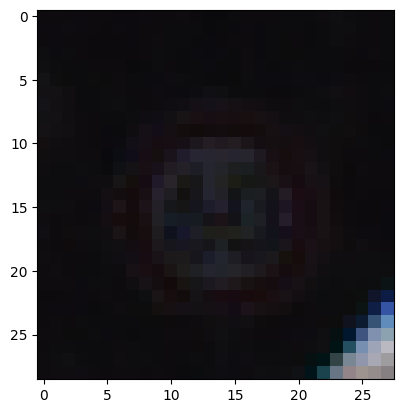

In [36]:
# Visualize a random test image
random_test_image_index = np.random.randint(len(test_images))
img = Image.open(test_path + '/' + sorted(os.listdir(test_path))[random_test_image_index])
plt.imshow(img)
plt.show()


In [37]:
# Original label
print("Original label: ", all_labels[y_test[random_test_image_index]])


Original label:  Speed limit (60km/h)


In [38]:
# Predicted label
print("Predicted label: ", all_labels[y_pred_classes[random_test_image_index]])


Predicted label:  Speed limit (60km/h)


In [39]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [40]:
# Convert one-hot encoded predictions back to integer labels
y_pred_int = np.argmax(y_pred, axis=1)

In [41]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_int)

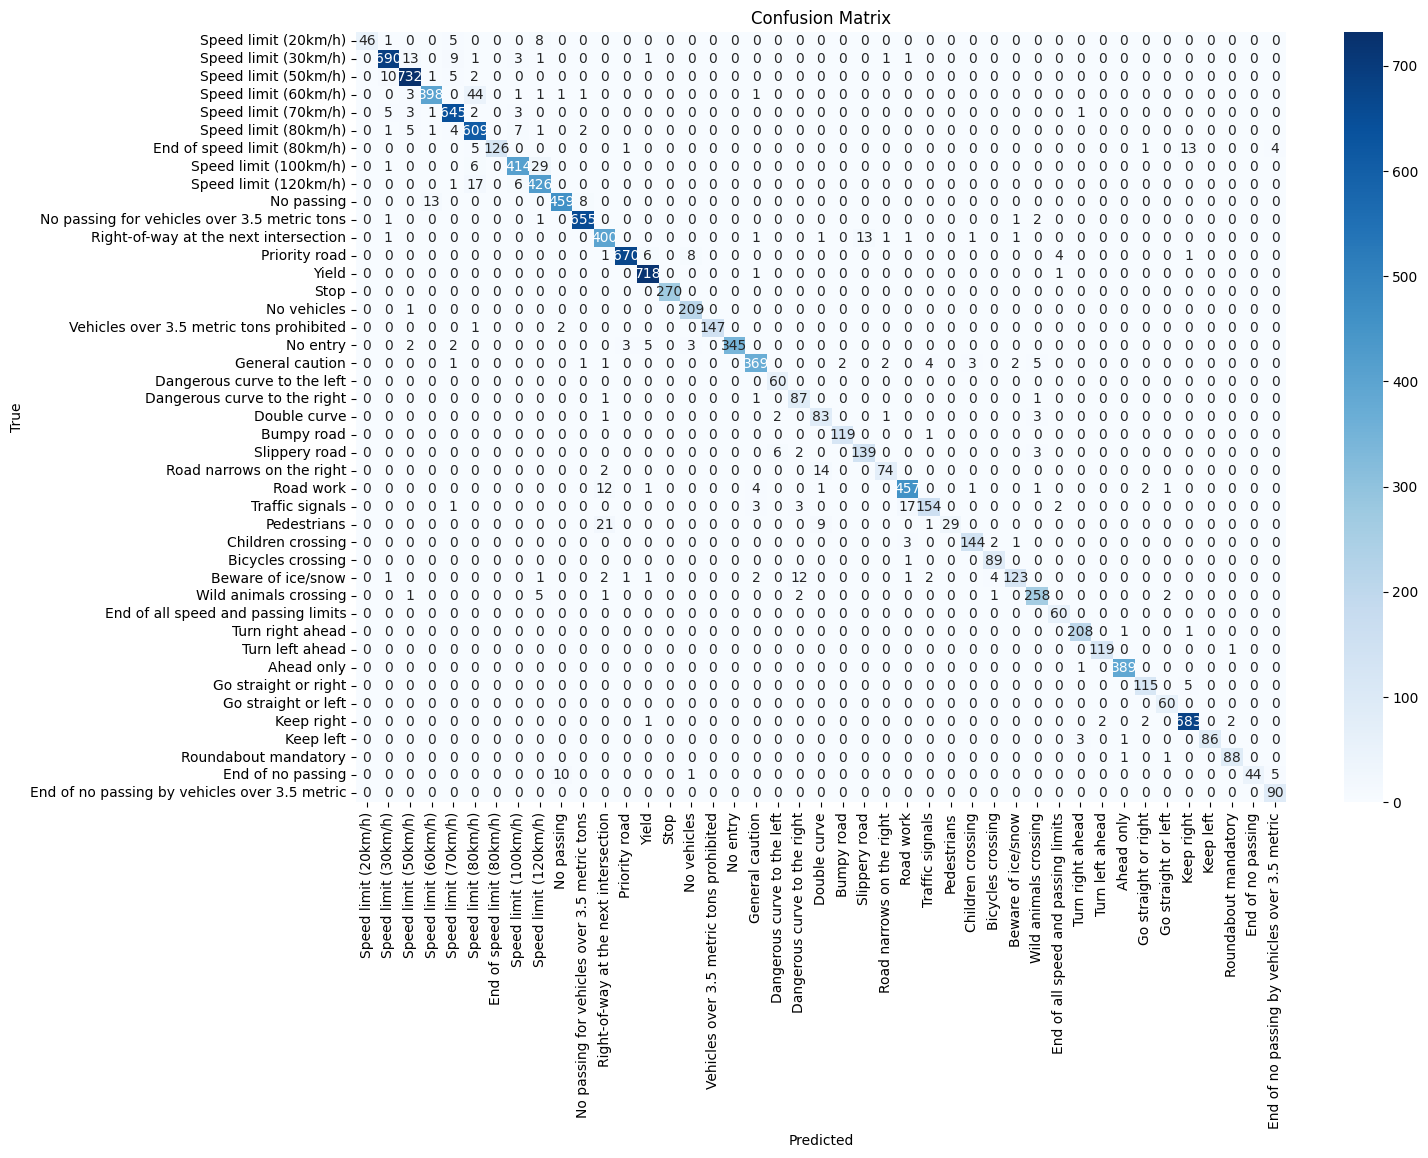

In [44]:
# Plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/drive/MyDrive/Traffic Sign Classification/confusion_matrix.png')
plt.show()